[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [3]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [4]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [5]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [6]:
x_col = 'BMI'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

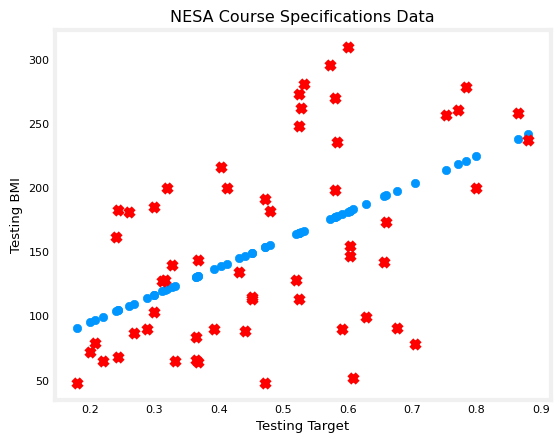

In [7]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [8]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.25401471894077554


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [9]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : abs(model_A.predict(x_test).round(2) - y_test)**2
})
print(table)
cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()

print(f"The cost or average loss of this model is {cost}")

      DoB    DoT  Predicted result        Loss
0   0.800  200.0        224.530409    601.7209
1   0.580  198.0        177.083301    437.6464
2   0.784  279.0        221.079710   3354.7264
3   0.312  127.0        119.284098     59.5984
4   0.472   48.0        153.791085  11191.5241
5   0.244   68.0        104.618628   1341.0244
6   0.364   66.0        130.498868   4160.2500
7   0.440   88.0        146.889687   3468.0321
8   0.600  310.0        181.396675  16537.9600
9   0.452  115.0        149.477711   1188.8704
10  0.480  182.0        155.516434    701.1904
11  0.404  216.0        139.125615   5908.9969
12  0.880  237.0        241.783902     22.8484
13  0.328  140.0        122.734796    298.2529
14  0.244  183.0        104.618628   6143.4244
15  0.704   78.0        203.826216  15833.1889
16  0.220   65.0         99.442580   1186.1136
17  0.656  142.0        193.474120   2649.1609
18  0.572  296.0        175.357952  14554.0096
19  0.772  261.0        218.491686   1807.1001
20  0.660  17

You may want to do some manual predictions to understand your model.

In [10]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[73.56233956]
[267.66414263]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [11]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: 51.995472555560255
Coefficient: [215.66867008]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [12]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [13]:
mx_col = ['BMI','BP','FDR']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

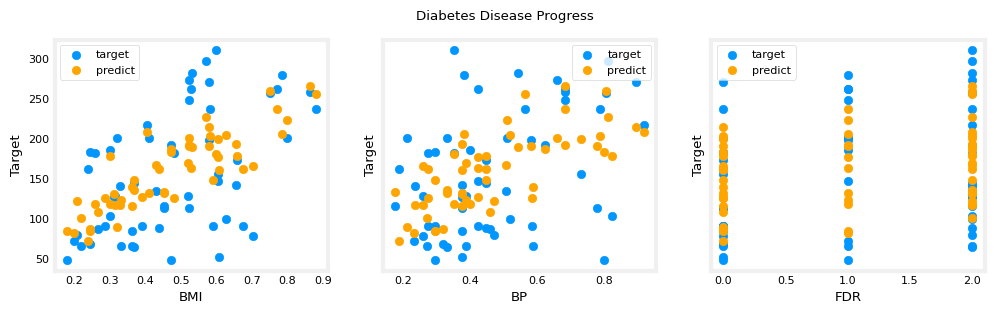

In [14]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [15]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.3387903190763467


In [16]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

[37.43587135]
[258.15250336]


In [17]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Loss'] = abs(model_C.predict(mx_test).round(2) - my_test)**2
table = pd.DataFrame(data)

cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()
print(f"The cost or average loss of this model is {cost}")

print(table)

The cost or average loss of this model is 1865.0987692982455
      BMI        BP  FDR  Target  Predicted result        Loss
0   0.800  0.509765  1.0   200.0        222.588274    510.3081
1   0.580  0.580353  1.0   198.0        190.218141     60.5284
2   0.784  0.380353  1.0   279.0        205.057872   5467.1236
3   0.312  0.376471  2.0   127.0        129.869845      8.2369
4   0.472  0.800000  0.0    48.0        183.413213  18335.8681
5   0.244  0.317647  0.0    68.0         87.206811    369.0241
6   0.364  0.588235  0.0    66.0        139.727516   5436.1129
7   0.440  0.447059  2.0    88.0        161.297943   5372.8900
8   0.600  0.352941  2.0   310.0        180.014354  16897.4001
9   0.452  0.176471  2.0   115.0        132.976567    323.2804
10  0.480  0.274471  0.0   182.0        125.602138   3180.9600
11  0.404  0.917647  2.0   216.0        207.778674     67.5684
12  0.880  0.564706  2.0   237.0        255.232511    332.3329
13  0.328  0.235294  2.0   140.0        116.878933    534

In [18]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: 6.645347562954015
Coefficient: [183.3282513  112.7961641   11.78082245]


#### Step 10. Polynomial Linear Regression

You should be able to understand the code snippets with less guidelines.

In [19]:
model_filename = 'my_saved_model_v3.sav'
poly_filename = 'my_saved_model_v3.sav' #changed file cause i dont have a 'my_saved_poly_v3.pkl'???

model_D = pickle.load(open(model_filename, 'rb'))
poly = pickle.load(open(poly_filename, 'rb'))

In [20]:
mx_col = ['BMI']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

In [29]:
# doesnt work??
poly = PolynomialFeatures(degree=4, include_bias=False) # so i added this
poly_features = poly.fit_transform(mx_test)

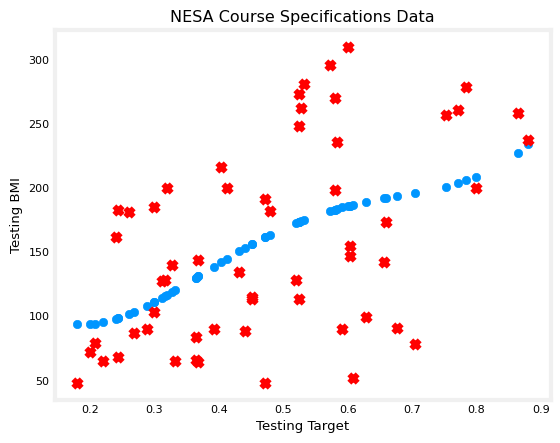

In [30]:
y_pred = model_D.predict(poly_features)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

In [24]:
test_score = model_D.score(poly_features, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.2540706033163278


In [25]:
new_poly_feature = poly.fit_transform([[0.1]])
print(model_D.predict(new_poly_feature))

[113.27859923]


In [26]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_D.predict(poly_features)
data['Loss'] = abs(model_D.predict(poly_features).round(2) - my_test)**2
table = pd.DataFrame(data)

cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()
print(f"The cost or average loss of this model is {cost}")

print(table)

The cost or average loss of this model is 2104.0626245614035
      BMI  Target  Predicted result        Loss
0   0.800   200.0        208.759781     76.7376
1   0.580   198.0        183.013885    224.7001
2   0.784   279.0        205.743885   5367.0276
3   0.312   127.0        114.281014    161.7984
4   0.472    48.0        161.414747  12861.8281
5   0.244    68.0         98.316591    919.3024
6   0.364    66.0        129.893381   4081.9321
7   0.440    88.0        152.795226   4199.0400
8   0.600   310.0        185.721228  15445.5184
9   0.452   115.0        156.128008   1691.6769
10  0.480   182.0        163.427014    344.8449
11  0.404   216.0        142.219886   5443.4884
12  0.880   237.0        234.427351      6.6049
13  0.328   140.0        118.922973    444.3664
14  0.244   183.0         98.316591   7170.7024
15  0.704    78.0        196.005421  13926.3601
16  0.220    65.0         95.013890    900.6001
17  0.656   142.0        191.726498   2473.0729
18  0.572   296.0        18

#### Step 11

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.